In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from numpy.linalg import svd


In [6]:
img1= cv2.imread("images/img1.jpg")
img2= cv2.imread("images/img2.jpg")
img3= cv2.imread("images/img3.jpg")
img4= cv2.imread("images/img4.jpg")
img1 = cv2.resize(img1,(1240,800))
img2 = cv2.resize(img2,(1240,800))
img3 = cv2.resize(img3,(1240,800))
img4 = cv2.resize(img4,(1240,800))

img1=  cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2=  cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img3=  cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)
img4=  cv2.cvtColor(img4,cv2.COLOR_BGR2GRAY)


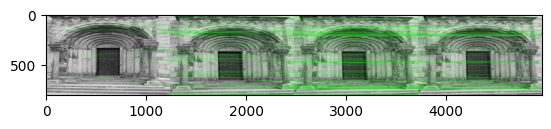

(<matplotlib.image.AxesImage at 0x24ac1470a60>, None)

In [51]:
sift = cv2.SIFT_create()

# fidnding keypoints 

kp_img1, des_img1 = sift.detectAndCompute(img1,None) 
kp_img2, des_img2 = sift.detectAndCompute(img2,None)
kp_img3, des_img3 = sift.detectAndCompute(img3,None)
kp_img4, des_img4 = sift.detectAndCompute(img4,None)
# kp_img1, des_img1 = kp_img1, des_img1[:180]
# kp_img2, des_img2 = kp_img2[:180], des_img2[:180]


# cv2.imshow("image 1", cv2.drawKeypoints(img1, kp_img1, None))
# cv2.waitKey()

# cv2.imshow("image 2", cv2.drawKeypoints(img2, kp_img2, None))
# cv2.waitKey()
# cv2.destroyAllWindows()

match = cv2.BFMatcher()
matches = match.knnMatch(des_img1,des_img2,k=2)
matches1 = match.knnMatch(des_img2,des_img3,k=2)
matches2= match.knnMatch(des_img3,des_img4,k=2)

good = []
for m,n in matches:
    if m.distance < 0.85*n.distance:
        good.append(m)

draw_params = dict(matchColor=(0,255,0),
                       
                       flags=2)

good1 = []
for m,n in matches1:
    if m.distance < 0.85*n.distance:
        good1.append(m)

draw_params1 = dict(matchColor=(0,255,0),
                       
                       flags=2)

good2 = []
for m,n in matches2:
    if m.distance < 0.85*n.distance:
        good2.append(m)

draw_params2 = dict(matchColor=(0,255,0),
                       
                       flags=2)

img00 = cv2.drawMatches(img1,kp_img1,img2,kp_img2,good,None,**draw_params)


plt.imshow(img00), plt.show()


In [52]:
img01 = cv2.drawMatches(img2,kp_img2,img3,kp_img3,good1,None,**draw_params1)
img02 = cv2.drawMatches(img3,kp_img3,img4,kp_img4,good2,None,**draw_params2)

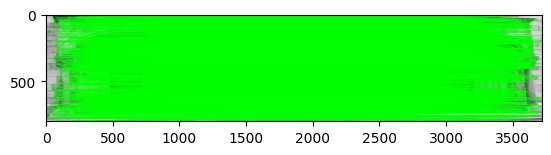

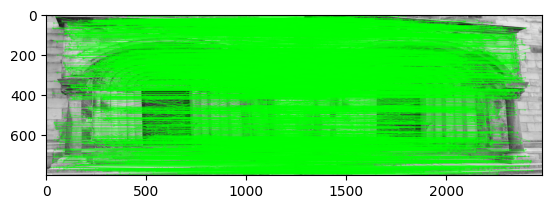

(<matplotlib.image.AxesImage at 0x24abf096ad0>, None)

In [53]:
plt.imshow(img01), plt.show()
plt.imshow(img02), plt.show()

In [32]:
def shift_to_barycenter(kp):
    x = [p.pt[0] for p in kp]
    y = [p.pt[1] for p in kp]
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    return np.array([(p.pt[0]-x_mean, p.pt[1]-y_mean) for p in kp])

In [33]:
W1 = shift_to_barycenter(kp_img1)
W2 = shift_to_barycenter(kp_img2)

In [34]:
kp_img1

array([[-599.40292802, -294.09003586],
       [-598.40415134, -194.55919785],
       [-598.40415134, -194.55919785],
       ...,
       [ 631.63535414,  245.28719192],
       [ 631.63535414,  245.28719192],
       [ 631.91343031,  306.03426224]])

In [36]:
W1

array([[-599.40292802, -294.09003586],
       [-598.40415134, -194.55919785],
       [-598.40415134, -194.55919785],
       ...,
       [ 631.63535414,  245.28719192],
       [ 631.63535414,  245.28719192],
       [ 631.91343031,  306.03426224]])

In [40]:
def build_J(W):
    N = W.shape[0]
    return np.hstack((W, np.zeros((N, 6))))

J = build_J(W1)

u, s, vh = svd(J)
V = vh.T
p = V[:, -1]